**In this session, we're going to work on different character encodings.**

## Get our environment set up

First thing we'll need to do is load in the libraries. Not our dataset, though: we'll get to it later!

> **Pre-requisite:** The most likely reason is that Python doesn't provide charset-normalizer in its standard library. You need to install it first! Before being able to import the Pandas module, you need to install it using Python's package manager pip.

**1.** Type "cmd" in the search bar and hit Enter to open the anaconda command prompt.


**2.** Type `“pip install charset-normalizer”` (without quotes) in command line and hit Enter. It installs charset-normalizer for your default Python installation.


**3.** Previous command may not work if you have both Python versions 2 and 3 on your computer. In this case, try `"pip3 install charset-normalizer"` or `“python -m pip install charset-normalizer“`.


**4.** Wait for installation to terminate successfully. It is now installed on your Windows machine.


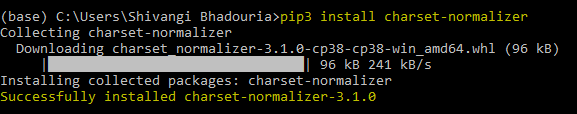

In [ ]:
# To Install charset_normalizer, use command: 

#pip3 install charset-normalizer

In [5]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful character encoding module
import charset_normalizer

# set seed for reproducibility
np.random.seed(0)

# What are encodings?

**Character encodings** are specific sets of rules for mapping from raw binary byte strings (that look like this: 0110100001101001) to characters that make up human-readable text (like "hi"). There are many different encodings, and if we tried to read in text with a different encoding than the one it was originally written in, we ended up with scrambled text called `"mojibake"` (said like mo-gee-bah-kay) which is just a **character transformation**. 

- Mojibake is the name for incorrect, unreadable characters shown when computer software fails to show text correctly. When using computers, text is encoded using a character encoding. In transfer, each character is replaced by its position (or number) in the encoding. To display the character again, the position is again replaced by the character. 


**Here's an example of mojibake:**

æ–‡å—åŒ–ã??

Mojibake often occurs when a character coding is incorrectly tagged in a document, or when a document is moved to a system with a different default coding than its preceding location. We might also end up with a "unknown" characters. There are what gets printed when there's no mapping between a particular byte and a character in the encoding we're using to read our byte string in and they look like this:

����������


- When the original encoding is not specified, a different character may be used when the number is again replaced with the character for display. Unicode was introduced to solve this problem: **UTF-8** is able to encode most common characters in 2 bytes.



Character encoding mismatches are less common today than they used to be, but it's definitely still a problem. There are lots of different character encodings, but the main one we need to know is UTF-8.

> UTF-8 is **the** standard text encoding. All Python code is in UTF-8 and, ideally, all our data should be as well. When codes aren't in UTF-8 then we run into trouble.


It was pretty hard to deal with encodings in Python 2, but thankfully in Python 3 it's a lot simpler. (Kaggle Notebooks only use Python 3.) There are 2 main data types we'll encounter when working with text in Python 3. One is the `string`, which is what `text` is by default.

In [13]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

**The other data is the [bytes](https://docs.python.org/3.1/library/functions.html#bytes) data type, which is a sequence of integers. We can convert a string into bytes by specifying which encoding it is in:**

In [14]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors="replace")

# check the type
type(after)

bytes

If we look at a bytes object, we'll see that it has `b` in front of it, and then maybe some text after. That's because bytes are printed out as if they were characters encoded in ASCII. (ASCII is an older character encoding that doesn't really work for writing any language other than English.) Here, we can see that our euro symbol  has been replaced with some mojibake that looks like "\xe2\x82\xac" when it's printed as if it were an ASCII string.

In [15]:
# take a look at what the bytes look like
after

b'This is the euro symbol: \xe2\x82\xac'

When we convert our bytes back to a string with the correct encoding, we can see that our text is all there correctly, which is great! :)

In [16]:
# convert it back to utf-8
print(after.decode("utf-8"))

This is the euro symbol: €


However, when we try to use a different encoding to map our bytes into a string, we get an error. This is because the encoding we're trying to use doesn't know what to do with the bytes we're trying to pass it. We need to tell Python the encoding that the byte string is actually supposed to be in.

> We can think of different encodings as different ways of recording music. We can record the same music on a CD, cassette tape or 8-track. While the music may sound more-or-less the same, we need to use right equipment to play music from each recording format. The correct decoder is like a cassette player or a CD player. If we try to play a cassette in a CD player, it just won't work. 

In [17]:
# try to decode our bytes with the ascii encoding
print(after.decode("ascii"))    # throw an error

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

We can also run into trouble if we try to use wrong encoding to map from a string to bytes. As we saw earlier, strings are UTF-8 by default in Python 3, so if we try to treat them like they were in another encoding we'll create problems. 

Let's say, if we try to convert a string to bytes for ASCII using `encode()`, we can ask for the bytes to be what they would be if the text was in ASCII. Since our text isn't in ASCII, though, there will be some characters it can't handle. 

- We can automatically replace characters that ASCII can't handle. If we do so, however, any characters not in ASCII will be replaced with unknown character. 


- Then, when we convert the bytes back to a string, the character will be replaced with the unknown character. The dangerous part about this is that there's not way to tell which character it *should* have been. That means we may have just made our data unusable!

In [7]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is the euro symbol: ?


**Inference:** This is bad and we want to avoid doing it! It's far better to convert all our text to UTF-8 as soon as we can and keep it in that encoding. The best time to convert non UTF-8 input into UTF-8  is when we read in files, which we'll talk about next.

## Reading in files with encoding problems

Most files we'll encounter will probably be encoded with UTF-8. This is what Python expects by default, so most of the time we won't run into problems. However, sometimes we'll get an error like this: 

In [28]:
# try to read in a file not in UTF-8
kickstarter_2016 = pd.read_csv("ks-projects-201612.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 11: invalid start byte

**Inference:** Notice that we are getting same `UnicodeDecodeError` we got when we tried to decode UTF-8 bytes as if they were ASCII! This tells us that this file isn't actually UTF-8. We don't know what encoding it actually *is* though. One way to figure it out is to try and test a bunch of different character encodings and see if any of them work. 

A better way, though, is to use the `charset_normalizer` module to try and automatically guess what the right encoding is. It's not 100% guaranteed to be right, but it's usually faster than just trying to guess.


Here, we're going to read first 10,000 bytes of this file to figure out the encoding type. This is usually enough for a good guess about what the encoding is and is much faster than trying to look at the whole file. (Especially with a large file this can be very slow.) Another reason to just look at the first part of the file is that:  we can see by looking at the error message that the first problem is the 11th character. So, we probably only need to look at the first little bit of the file to figure out what's going on.

In [34]:
# look at the first ten thousand bytes to guess the character encoding
with open("ks-projects-201612.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'windows-1250', 'language': 'English', 'confidence': 1.0}


**Inference:** So charset_normalizer is 100% confidence that the right encoding is "Windows-1250". Let's see if that's correct:

In [37]:
# read in the file with the encoding detected by charset_normalizer
kickstarter_2016 = pd.read_csv("ks-projects-201612.csv", encoding='Windows-1252')

# look at the first few lines
kickstarter_2016.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


Yep, looks like charset_normalizer was right! The file reads in with no problem (although we do get a warning about datatypes) and when we look at the first few rows it seems to be fine. 

> **What if the encoding charset_normalizer guesses isn't right?** Since charset_normalizer is basically just a fancy guesser, sometimes it will guess the wrong encoding. One thing you can try is looking at more or less of the file and seeing if you get a different result and then try that.



# Saving your files with UTF-8 encoding

Finally, once you've gone through all the trouble of getting your file into UTF-8, you'll probably want to keep it that way. The easiest way to do that is to save your files with UTF-8 encoding. The good news is, since UTF-8 is the standard encoding in Python, when you save a file it will be saved as UTF-8 by default:

In [40]:
# save our file (will be saved as UTF-8 by default!)
kickstarter_2016.to_csv("ks-projects-201801-utf8.csv")